In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## All Feature no Prep

In [31]:
#the data can be both array or series
X = data[['TV','Radio','Newspaper']]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  1.99188555182879


## Data Prep

In [14]:
#check missing
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [23]:
#check data type
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [26]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Scaling

The values of radio & newspaper have a very different range then TV. Try standard scaling.

In [37]:
X = data[['TV','Radio','Newspaper']]
y = data.Sales

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  4.503125945046118


Unlike some other algorithm, Linear Regression doesn't need scaling. This is because linreg is not distance based like clustering, and it handles features with different magnitude just fine.

Scaling won't improve accuracy

However, we can scale both x & y

In [38]:
X = data[['TV','Radio','Newspaper']]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model.predict(X_test_scaled)

#the y_pred is a scaled one so we have to convert it back
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  4.50312594504612


We can see that scaling doesn't do much for linreg. Scale only change coefficients not predictions. However, we can see different result with scaling once we do gradient_descent or neural network regression.

## Use correlated feature

In [36]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


We can see that TV and radio have better correlation than newspaper. We will try using only these two features

In [39]:
X = data[['TV', 'Radio']]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  1.955221885011317


The MSE decreased but not that much. We can try using only TV feature since its the most correlated to Sales

### Use 1 Feature

In [42]:
#for the model, X has to be 2D and y only 1D, thus the double bracket for X
X = data[['TV']]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  10.859345325608267


Even though TV has the highest correlation, it instead gives the highest MSE. This could happen because even though the 2 variable have a relationship, it is maybe not a linear relationship thus the high MSE.

### Plotting the 1 feature

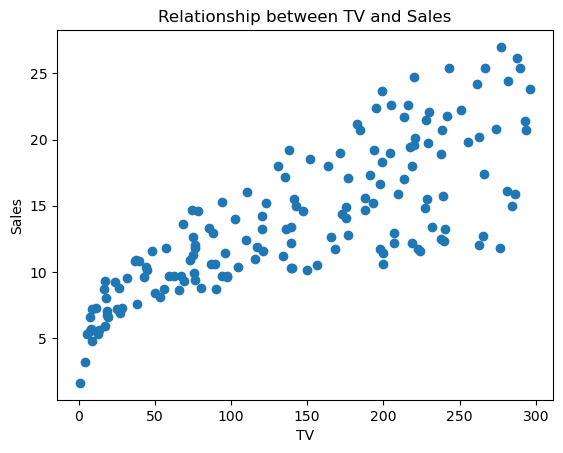

In [46]:
plt.scatter(X_train, y_train)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Relationship between TV and Sales')
plt.show()

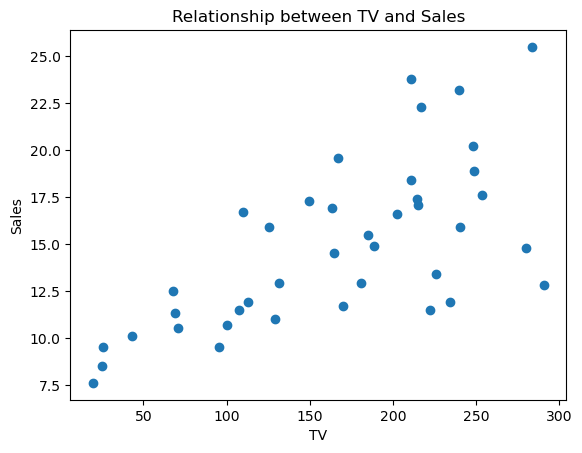

In [47]:
plt.scatter(X_test, y_test)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Relationship between TV and Sales')
plt.show()

We can see that even though there is a relationship and it gives an upward trend, the data points become even more further apart the higher the TV. This is why when using only this feature for linreg, it will give high MSE especially for the large data points

# Regularization

we do regularization to reduce the weights of each feature, helping reduce the overfitting of the model

In [4]:
from sklearn.linear_model import Ridge, Lasso
#ridge & lasso regularization is already a linear model

X = data[['TV','Radio','Newspaper']]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)
lr_pred = model.predict(X_test)

#ridge regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)

#lasso regularization
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)

#look at mse
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_pred))
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_pred))

# Look at coefficients
print("\nLinear Coefficients:", model.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)

Linear Regression MSE: 1.99188555182879
Ridge Regression MSE: 1.991996636141797
Lasso Regression MSE: 2.044663285195565

Linear Coefficients: [0.0468431  0.17854434 0.00258619]
Ridge Coefficients: [0.04684311 0.17853854 0.00258787]
Lasso Coefficients: [0.04678152 0.17490187 0.00142624]


We can see that the model perfomance doesn't necessarily improved. This is because reguralization's main goal is to prevent overfitting and helps the model generatlize to new/unseen data. It can also increase MSE slightly because it forces the weights to be smaller.

The advertising dataset itself is small and clean, few features and not much noise. This is why ordinary linear regression won't overfit the data, thus the similar MSE.